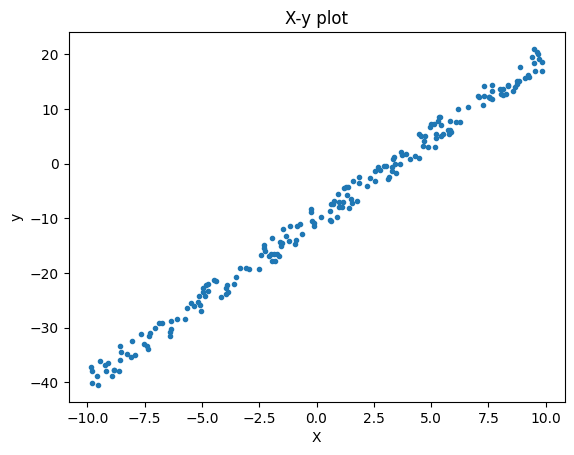

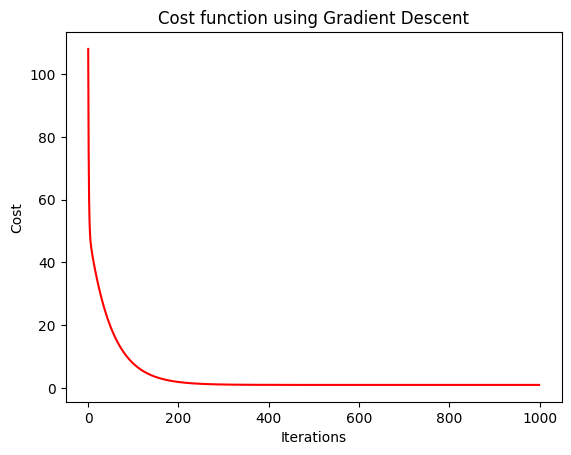

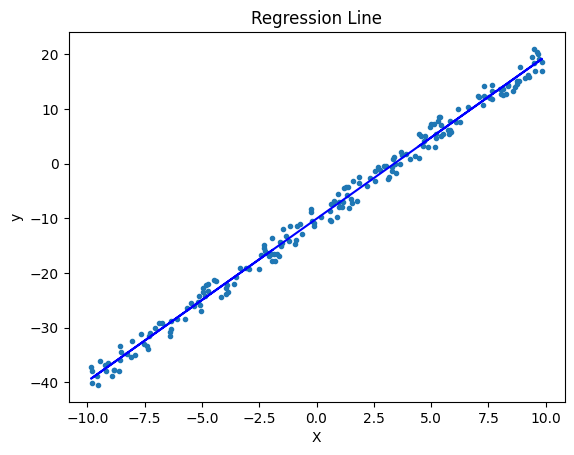

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('univariate_linear_regression.csv')
X = data['x'].values.reshape((-1, 1))
y = data['y'].values.reshape((-1, 1))

# Plot
plt.scatter(X, y, s=9)
plt.xlabel('X')
plt.ylabel('y')
plt.title('X-y plot')
plt.show()

class LinearRegression:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.w = np.zeros((1, 1))  # Initialize weights
        self.b = 0  # Initialize bias

    def cost_func(self, w, b):
        m = len(self.y)
        J_wb = (1 / (2 * m)) * np.sum(((np.dot(self.X, w) + b) - self.y) ** 2)
        return J_wb

    def gradient_descent(self, w, b, alpha, iters):
        m = self.y.shape[0]
        cost_history = np.zeros(iters)

        for i in range(iters):
            y_pred = (np.dot(self.X, w) + b)
            dw = (alpha / m) * np.dot(self.X.T, (y_pred - self.y))
            db = alpha * (1 / m) * np.sum(y_pred - self.y)
            w = w - dw
            b = b - db
            cost_history[i] = self.cost_func(w, b)
        
        return w, b, cost_history

# Initialize parameters
w = np.zeros((1, 1))
b = 0
alpha = 0.01
iterations = 1000

lr = LinearRegression(X, y)
w, b, cost_history = lr.gradient_descent(w, b, alpha, iterations)

# Plotting the cost function
plt.plot(range(iterations), cost_history, 'r')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function using Gradient Descent')
plt.show()

# Plot the regression line
plt.scatter(X, y, s=9)
plt.plot(X, np.dot(X, w) + b, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Line')
plt.show()
